In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle
import hist
import mplhep as hep
from TUnfold import *
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

objc[78542]: Class RunStopper is implemented in both /Users/ren/Applications/root/lib/libCore.6.28.06.so (0x112052148) and /usr/local/lib/libCore.so (0x12b1aa1f0). One of the two will be used. Which one is undefined.


Welcome to JupyROOT 6.28/06
0.7.21
4.3.7


In [2]:
#### open files                                                                                                                                               
#fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUnc2018.pkl"
# fname="coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_allUnc2018.pkl"
# fname="coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUncRespOnlyNEW2018.pkl"
# fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_newMBins_rapidity2.5_nominal2018.pkl"
#### Latest files
fname="coffeaOutput/trijetHists_wXSscaling_QCDsim_newMBins_rapidity2.5_nominal2018.pkl"
fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_newMBinsDR_rapidity2.5_nominal2018.pkl"
year = fname[-8:-4]
with open(fname, "rb") as f:
    result = pickle.load( f )
# fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rapidity2.5_nominal2018.pkl"
# fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5_nominalNEW2018.pkl"
#### Latest files
fname = "coffeaOutput/trijetHists_JetHT_newMBins_rapidity2.5_nominal2018.pkl"
fname= "coffeaOutput/dijetHists_JetHT_newMBins_rapidity2.5_nominal2018.pkl"

with open(fname, "rb") as f:
    result_data = pickle.load( f )
if "dijet" in fname:
    os_path = "plots/unfolding/dijet/"
    channel = "Dijet"
else:
    os_path = "plots/unfolding/trijet/"
    channel = "Trijet"
checkdir(os_path)
os_path=os_path+"test"
print(year)                                                                                                                                                    
axis_names = [ax.name for ax in result['ptreco_mreco_u'].axes]
cats = [cat for cat in result['ptreco_mreco_u'].project('ptreco','mreco').axes[0]]
availSysts = [ax for ax in result['ptreco_mreco_u'].project("syst").axes[0]]
detectorBinning, generatorBinning, mreco_edges, ptreco_edges, mgen_edges, ptgen_edges = setupBinning(result)
#### for data get results once                                                                                                                            
DataReco_u, DataReco_g = fillData(result_data, detectorBinning, mreco_edges, ptreco_edges, new=True)
syst_hist_dict = {} 
for syst in availSysts:                                                                                                                                     
    hist = getHists(result, syst, detectorBinning, generatorBinning, new=True)
    syst_hist_dict[syst]=hist
    print("Building response matrices for systematic ", syst)
    #### check that response matrix has been filled properly                                                                                              
    # MCReco_u_M=hist['MCGenRec_u'].ProjectionY("MCReco ungroomed")
    # MCTruth_u_M=hist['MCGenRec_u'].ProjectionX("MCTruth ungroomed")
    #MCReco_u_M.Print("all")                                                                                                                              
    # MCReco_g_M=hist['MCGenRec_g'].ProjectionY("MCReco groomed")
    # MCTruth_g_M=hist['MCGenRec_g'].ProjectionX("MCTruth groomed")
    #### plot inputs and check that they match matrix

2018
Building response matrices for systematic  L1prefiringUp
Building response matrices for systematic  PUSFDown
Building response matrices for systematic  PUSFUp
Building response matrices for systematic  L1prefiringDown
Building response matrices for systematic  nominal


MCTruth ungroomed
histMCGenRec Ungroomed nominal
MCTruth groomed
histMCGenRec Groomed nominal


Info in <TCanvas::Print>: png file plots/unfolding/dijet/testMCInput_ungroomed_nominalflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testMCInput_groomed_nominalflatmatrix2018.png has been created


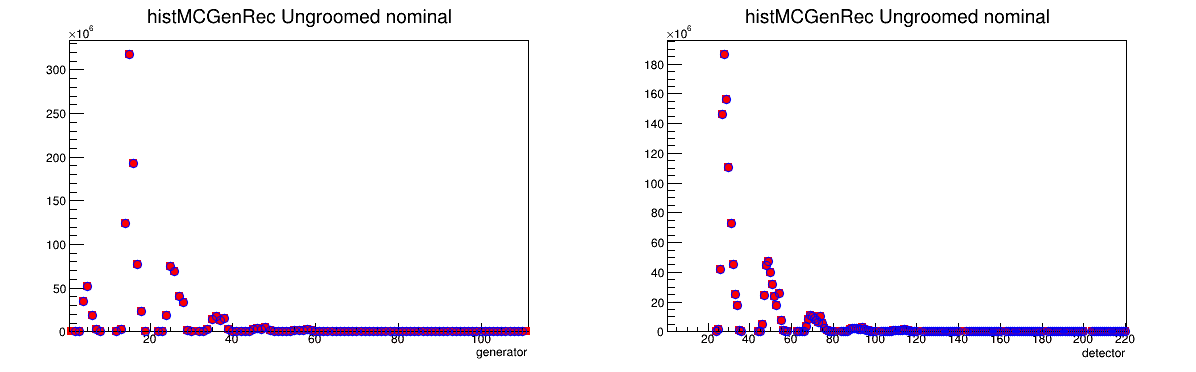

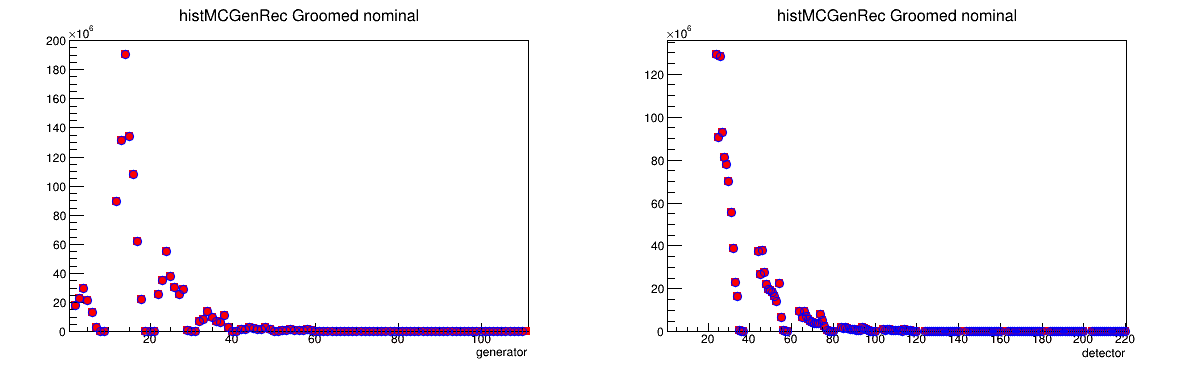

In [3]:
#### plot inputs to response matrix unrolled
hist = syst_hist_dict["nominal"]
c1 = plotinputsROOT(hist['MCGenRec_u'], hist['MCTruth_u'], hist['MCReco_u'], groom="ungroomed", syst="nominal", year=year, ospath=os_path)
c2 = plotinputsROOT(hist['MCGenRec_g'], hist['MCTruth_g'], hist['MCReco_g'], groom="groomed", syst="nominal", year=year, ospath=os_path)

[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.]


Error in <TAxis::SetBinLabel>: Illegal bin number: 0
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testRespMatrix_ungroomed_nominal2018.png has been created


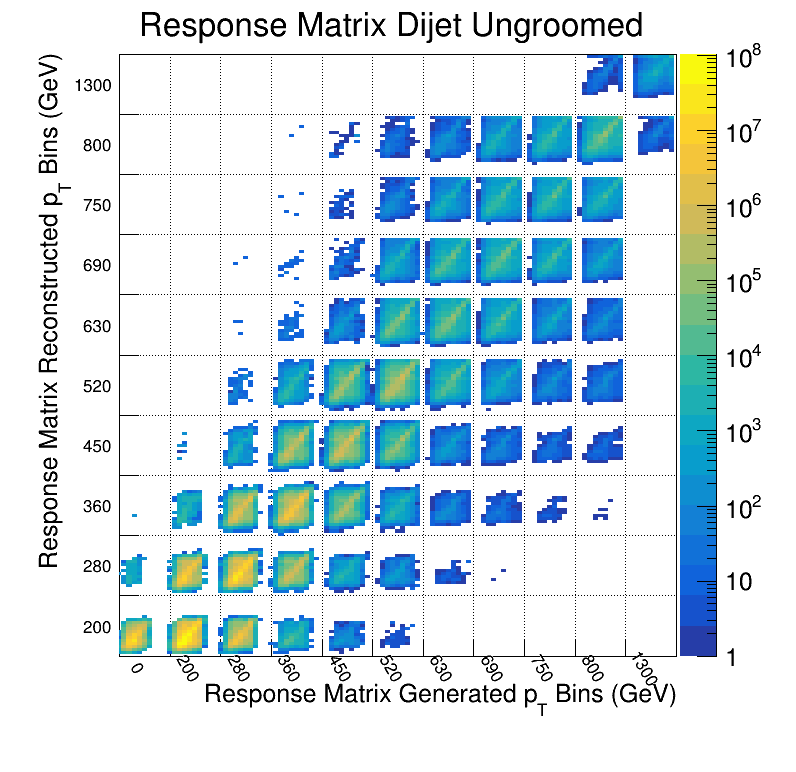

In [4]:
# -------------------------------------------------------------------------------------
# Draw response matrix pretty
# -------------------------------------------------------------------------------------
print(ptgen_edges)
### make M without fakes so can be drawn prettily
M = syst_hist_dict["nominal"]["MCGenRec_u"]
c1 = ROOT.TCanvas("c1", "response", 800, 800)
c1.Clear()
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 
M.GetZaxis()
M.Draw("colz")
#### set custom axis labels
M.GetXaxis().SetRangeUser(2, M.GetNbinsX())
M.GetYaxis().SetRangeUser(2, M.GetNbinsY())
axislabels = ROOT.TH2F("axes", ";Reconstructed Bin;Generated Bin", len(ptgen_edges)-1, 2, M.GetNbinsX()+1, len(ptgen_edges)-2, len(mreco_edges)+2, M.GetNbinsY()+1 )
for ibin in range(0,len(ptgen_edges)-1):
    axislabels.GetXaxis().SetBinLabel( ibin+1, str( int(ptgen_edges[ibin])) )
    axislabels.GetXaxis().ChangeLabel(ibin+1,300.,-1,-1)
    axislabels.GetYaxis().SetBinLabel( ibin, str( int(ptgen_edges[ibin])) )
c1.SetGrid()
axislabels.SetTitle("Response Matrix "+channel+" Ungroomed;Response Matrix Generated p_{T} Bins (GeV);Response Matrix Reconstructed p_{T} Bins (GeV)")
# axislabels.GetXaxis().SetNdivisions( 400+len(ptgen_edges)-1, False)
# axislabels.GetYaxis().SetNdivisions( 400+len(ptgen_edges)-1, False)
axislabels.Draw("axis")
axislabels.SetMaximum(M.GetBinContent(M.GetMaximumBin()))
axislabels.SetMinimum(1)
M.GetXaxis().SetLabelSize(0)
M.GetYaxis().SetLabelSize(0)
# M.GetXaxis().SetNdivisions( 400 + len(ptgen_edges), False)
# M.GetYaxis().SetNdivisions( 400 + len(ptgen_edges), False)
M.GetXaxis().SetTitleOffset(1.5)
M.GetYaxis().SetTitleOffset(1.5)
M.SetTitle("Dijet Response Ungroomed")
M.Draw("colz same")
c1.SetLogz()
c1.Draw()
c1.SaveAs(os_path+"RespMatrix_ungroomed_nominal"+year+".png")

[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: axes (Potential memory leak).
Error in <TAxis::SetBinLabel>: Illegal bin number: 0
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testRespMatrix_groomed_nominal2018.png has been created


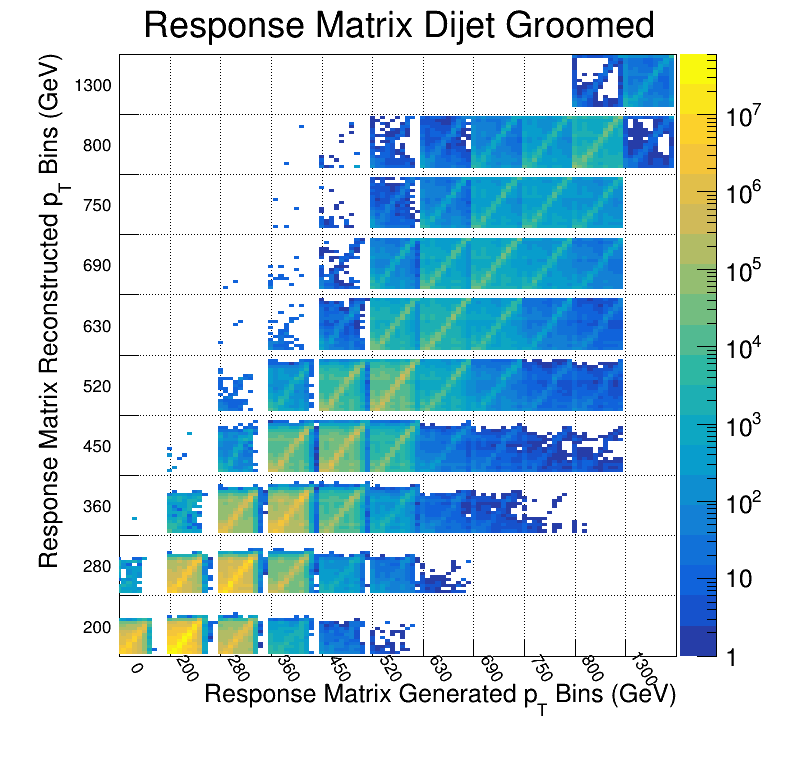

In [5]:
# -------------------------------------------------------------------------------------
# Draw response matrix pretty
# -------------------------------------------------------------------------------------
print(ptgen_edges)
### make M without fakes so can be drawn prettily
M = syst_hist_dict["nominal"]["MCGenRec_g"]
c1 = ROOT.TCanvas("c1", "response", 800, 800)
c1.Clear()
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 
M.GetZaxis()
M.Draw("colz")
#### set custom axis labels
M.GetXaxis().SetRangeUser(2, M.GetNbinsX())
M.GetYaxis().SetRangeUser(len(mreco_edges)+2, M.GetNbinsY())
axislabels = ROOT.TH2F("axes", ";Reconstructed Bin;Generated Bin", len(ptgen_edges)-1, 2, M.GetNbinsX()+1, len(ptgen_edges)-2, len(mreco_edges)+2, M.GetNbinsY()+1 )
for ibin in range(0,len(ptgen_edges)-1):
    axislabels.GetXaxis().SetBinLabel( ibin+1, str( int(ptgen_edges[ibin])) )
    axislabels.GetXaxis().ChangeLabel(ibin+1,300.,-1,-1)
    axislabels.GetYaxis().SetBinLabel( ibin, str( int(ptgen_edges[ibin])) )
c1.SetGrid()
axislabels.SetTitle("Response Matrix "+channel+" Groomed;Response Matrix Generated p_{T} Bins (GeV);Response Matrix Reconstructed p_{T} Bins (GeV)")
# axislabels.GetXaxis().SetNdivisions( 400+len(ptgen_edges)-1, False)
# axislabels.GetYaxis().SetNdivisions( 400+len(ptgen_edges)-1, False)
axislabels.Draw("axis")
axislabels.SetMaximum(M.GetBinContent(M.GetMaximumBin()))
axislabels.SetMinimum(1)
M.GetXaxis().SetLabelSize(0)
M.GetYaxis().SetLabelSize(0)
# M.GetXaxis().SetNdivisions( 400 + len(ptgen_edges), False)
# M.GetYaxis().SetNdivisions( 400 + len(ptgen_edges), False)
M.GetXaxis().SetTitleOffset(1.5)
M.GetYaxis().SetTitleOffset(1.5)
M.Draw("colz same")
c1.SetLogz()
c1.Draw()
c1.SaveAs(os_path+"RespMatrix_groomed_nominal"+year+".png")

In [6]:
from matplotlib.lines import Line2D
print(list(Line2D.markers.keys()))
markers = ['.', ',', 'o', 'v', 's', 'p', '*', 'h', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', '']
def plotStackedOutput(htrue, u, groomed=False, norm=True, os_path='', channel='', IOV=''): #, oMat, oSys, oTotal):                                                 
    #### plotting options                                                                                                                                     
    tot_error_opts = {
            'facecolor': 'powderblue',
            'linewidth': 0
        }
    stat_error_opts = {
            'label': 'Stat. Unc.',
                    'hatch': '///',
                    'edgecolor': 'black',
            'facecolor': 'none',
            'linewidth': 0
        }
    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 5.,
            'color': 'k',
            'elinewidth': 1,
        }
    #### u is total unfolding object, htrue is truth hist from coffea                                                                                         
    o = u.GetOutput("u")
    mCovInput = u.GetEmatrixInput("Input unc")
    inputErrTot = np.array([mCovInput.GetBinContent(i,i)**0.5 for i in range(0, o.GetNbinsX()+1)])
    ptedges = [bin[0] for bin in htrue.project("ptgen").axes[0]] + [htrue.project("ptgen").axes[0][-1][1]]
    print(ptedges)
    medges = [bin[0] for bin in htrue.project('mgen').axes[0]]+ [htrue.project('mgen').axes[0][-1][1]]
    widths = htrue.project("mgen").axes[0].widths
    xlim = medges[-1]
    #### set up figure                                                                                                                                    
    fig, ax= plt.subplots()
    ax.set_ylabel(r'$\frac{1}{d\sigma/dp_T}\frac{d^2\sigma}{dmdp_T} (GeV^{-1})$', loc = 'top')
    if groomed:
        ax.set_xlabel(r'$m_{SD, RECO} (GeV)$' )
    else: ax.set_xlabel(r'$m_{RECO} (GeV)$' )
    hep.cms.label("Simulation", year=IOV, data = False, loc=0, ax=ax, fontsize=18);
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(10**-6,10**14)
    ax.set_xlim(5., 500.)
    for ipt in range(1,len(ptedges)-1):
        j = ipt-1 #index for coffea bc no underflow bin                                                                                                       
        inputErr = np.array([inputErrTot[(im+2+ipt*(len(medges)-1))] for im in range(0, len(medges)-1)])
        oErr = np.array([o.GetBinError(im+2+ipt*(len(medges)-1)) for im in range(0, len(medges)-1)])
        oVals = np.array([o.GetBinContent(im+2+ipt*(len(medges)-1)) for im in range(0, len(medges)-1)])
        oHistVals = np.array([o.GetBinContent(im+2+ipt*(len(medges)-1)) for im in range(0, len(medges)-1)])
        oHistErr = oErr
        hist = htrue[{'ptgen':j, 'syst':"nominal"}].project("mgen")
        if norm:
            print("Check that sum of values ", np.sum(hist.values())," is same as integrate ", hist.integrate("mgen").value)
            hist = hist*1.0/hist.integrate("mgen").value
            oVals_sum = np.sum(oVals)
            oHistVals = oVals*1.0/oVals_sum
            oHistErr = oHistErr/oVals_sum
            #inputErr = inputErr*1.0/oVals_sum
            print("oVals after norm ", oVals, " by value ", np.sum(oVals)) 
        scale = 10**ipt
        histVals = hist.values()*scale
        oHistVals =  oHistVals*scale
        # ax.stairs(values=(mcvals.values()+stat_unc_up)/widths, edges = edges, baseline= (mcvals.values()-stat_unc_down)/widths,                             
        #         fill=True,                                                                                                                                  
        #         **stat_error_opts,                         
        #     )                                                                                                                                               
        hep.histplot(oHistVals[1:]/widths[1:], medges[1:], stack=False, histtype='errorbar', yerr = np.zeros_like(oHistErr)[1:],
                 ax=ax, marker=markers[ipt+1], color = 'Black',markersize=5.,
                 label=str(ptedges[j])+"-" +str(ptedges[j+1]) + r" GeV x $10^{}$".format(ipt))
        if ipt == 1:
            hep.histplot(histVals[1:]/widths[1:], medges[1:], stack=False, histtype='step',
                 ax=ax, linestyle ='--', color = 'Red', linewidth=1, label="Pythia8 "+channel)
            ax.stairs(values=(oHistVals[1:]+oHistErr[1:])/widths[1:], edges = medges[1:], baseline= (oHistVals[1:]-oHistErr[1:])/widths[1:],fill=True,
                **tot_error_opts,label="Stat. Unc."
            )
        else: 
            hep.histplot(histVals[1:]/widths[1:], medges[1:], stack=False, histtype='step',
                 ax=ax, linestyle ='--', color = 'Red', linewidth=1,)
            ax.stairs(values=(oHistVals[1:]+oHistErr[1:])/widths[1:], edges = medges[1:], baseline= (oHistVals-oHistErr)[1:]/widths[1:],
                fill=True,
                **tot_error_opts,
            )
        leg = ax.legend(loc=9, fontsize=14, labelspacing=0.25, ncol=2)
        leg.set_visible(True)
    if groomed: os_path=os_path+"Groomed"
    if norm:
        fig.savefig(os_path+"UnfoldOutputStackedPt_normed.png", bbox_inches="tight") 
    else:
        fig.savefig(os_path+"UnfoldOutputStackedPt.png", bbox_inches="tight") 

['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', '']


In [7]:
def plotUnfoldOutputHist(htrue, u, groomed=False, norm=True, os_path='', channel='', IOV=''): #, oMat, oSys, oTotal):                                                 
    #### plotting options                                                                                                                                     
    tot_error_opts = {
            'label': 'Stat. Unc.',
            'facecolor': 'powderblue',
            'linewidth': 0
        }
    stat_error_opts = {
            'label': 'Stat. Unc.',
                    'hatch': '///',
                    'edgecolor': 'black',
            'facecolor': 'none',
            'linewidth': 0
        }
    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }
    #### u is total unfolding object, htrue is truth hist from coffea                                                                                         
    o = u.GetOutput("u")
    mCovInput = u.GetEmatrixInput("Input unc")
    inputErrTot = np.array([mCovInput.GetBinContent(i,i)**0.5 for i in range(0, o.GetNbinsX()+1)])
    ptedges = [bin[0] for bin in htrue.project("ptgen").axes[0]] + [htrue.project("ptgen").axes[0][-1][1]]
    print(ptedges)
    medges = [bin[0] for bin in htrue.project('mgen').axes[0]]+ [htrue.project('mgen').axes[0][-1][1]]
    widths = htrue.project("mgen").axes[0].widths
    xlim = medges[-1]
    if groomed: os_path=os_path+"Groomed"
    for ipt in range(1,len(ptedges)):
        j = ipt-1 #index for coffea bc no underflow bin                                                                                                       
        inputErr = np.array([inputErrTot[(im+2+ipt*(len(medges)-1))] for im in range(0, len(medges)-1)])
        oErr = np.array([o.GetBinError(im+2+ipt*(len(medges)-1)) for im in range(0, len(medges)-1)])
        oVals = np.array([o.GetBinContent(im+2+ipt*(len(medges)-1)) for im in range(0, len(medges)-1)])
        oHistVals = np.array([o.GetBinContent(im+2+ipt*(len(medges)-1)) for im in range(0, len(medges)-1)])
        oHistErr = oErr
        hist = htrue[{'ptgen':j, 'syst':"nominal"}].project("mgen")
        #### set up figure                                                                                                                                    
        fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
        ax.set_ylabel(r'$\frac{Events}{Bin Size} (GeV^{-1})$', loc = 'top')
        ax.text(0.60, 0.70, str(ptedges[j])+r"$<p_{T}<$" +str(ptedges[j+1]) + " GeV",
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='green', fontsize=14)
        rax.set_ylim(0.5, 2)
        ax.set_xlim(5, 1000.)
        ax.set_yscale('log')
        rax.set_xlim(5, 1000.)
        hep.cms.label("Preliminary", year=IOV, data = True, loc=0, ax=ax, fontsize=18);
        if groomed:
            ax.set_xlabel(r'$m_{SD, RECO} (GeV)$' )
        if norm:
            print("Check that sum of values ", np.sum(hist.values())," is same as integrate ", hist.integrate("mgen").value)
            hist = hist*1.0/hist.integrate("mgen").value
            oVals_sum = np.sum(oVals)
            oHistVals = oVals*1.0/oVals_sum
            oHistErr = np.sqrt(oVals)/oVals_sum
            #inputErr = inputErr*1.0/oVals_sum
            print("oVals after norm ", oVals, " by value ", np.sum(oVals))
        ratio = np.divide(hist.values(),oHistVals,
                      out=np.empty(np.array(hist.project("mgen").values()).shape).fill(1),
                      where= oHistVals!=0,)
        # ratio_staterr_up = np.divide(mcvals.values()+stat_unc_up+syst_unc_up,datavals.values(),                                                             
        #               out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),                                                                           
        #               where=datavals.values()!= 0,)                                                                                                         
        # ratio_staterr_down = np.divide(mcvals.values()-stat_unc_down-syst_unc_down,datavals.values(),                                                       
        #               out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),                                                                           
        #               where=datavals.values()!= 0,)         
        ratio_toterr_up = np.divide(oHistVals+oHistErr,oHistVals,
                      out=np.empty(np.array(oVals.shape)).fill(np.nan),
                      where=oHistVals!= 0,)
        ratio_toterr_down = np.divide(oHistVals-oHistErr,oHistVals,
                      out=np.empty(np.array(oVals.shape)).fill(np.nan),
                      where=oHistVals!= 0,)
        ratio_err = np.abs(np.divide(oHistErr,oHistVals,
                      out=np.empty(np.array(oVals.shape)).fill(np.nan),
                      where=oHistVals!= 0,))
        rax.stairs(values=ratio_toterr_up, edges = medges, baseline= ratio_toterr_down,
                fill=True,
                **tot_error_opts,
            )
        # rax.stairs(values=ratio_statterr_up, edges = medges, baseline= ratio_statterr_down,                                                                 
        #         fill=True,                                                                                                                                  
        #         **stat_error_opts,                                                                                                                          
        #     )                                                                                                                                               
        ax.stairs(values=(oHistVals+oHistErr)/widths, edges = medges, baseline= (oHistVals-oHistErr)/widths,
                fill=True,
                **tot_error_opts,
            )
        # ax.stairs(values=(mcvals.values()+stat_unc_up)/widths, edges = edges, baseline= (mcvals.values()-stat_unc_down)/widths,                             
        #         fill=True,                                                                                                                                  
        #         **stat_error_opts,                         
        #     )                                                                                                                                               
        hep.histplot(oHistVals, medges, stack=False, histtype='errorbar', yerr = abs(oHistErr),
                 ax=ax, marker =["."], color = 'Black', linewidth=1, binwnorm=True,
                 label="Unfolded "+channel+" Data")
        hep.histplot(hist, stack=False, histtype='step',
                 ax=ax, linestyle ='--', color = 'Black', linewidth=1, binwnorm=True,
                     label="MC Truth "+channel)
        hep.histplot(ratio, medges, histtype='step', ax=rax, linestyle ="--", color = 'black', linewidth=1)
        hep.histplot(np.ones_like(ratio), medges, histtype='errorbar',ax=rax,marker=['.'], color = 'black', linewidth=1, yerr = ratio_err)
        leg = ax.legend(loc='best', fontsize=14, labelspacing=0.25)
        leg.set_visible(True)
        if norm:
            fig.savefig(os_path+"UnfoldOutputRatioPt{}_{}_normed.png".format(ptedges[j], ptedges[j+1]), bbox_inches="tight") 
        else:
            fig.savefig(os_path+"UnfoldOutputRatioPt{}_{}.png".format(ptedges[j], ptedges[j+1]), bbox_inches="tight") 

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 7 output bins do not depend on the input data  9-11 20-21 31 112
Info in <TUnfold::TUnfold>: 220 input bins and 106 output bins (includes 1 underflow bin)
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (xaxis:generator[8.5,9.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:generator[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:generator[10.5,11.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #20 (xaxis:generator[19.5,20.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #21 (xaxis:generator[20.5,21.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #31 (xaxis:generator[30.5,31.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #112 (xaxis:generator[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 51/2

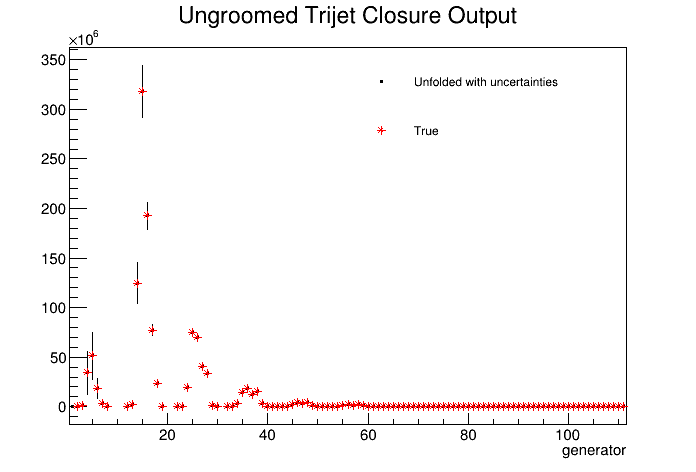

In [8]:
#### do closure test for ungroomed
M = syst_hist_dict["nominal"]["MCGenRec_u"]
M.SetName("Matrix to unfold")
# h = syst_hist_dict["nominal"]["MCGenRec_u"].ProjectionY("Reco ungroomed")
h = syst_hist_dict["nominal"]["MCReco_u"]
h.SetName("Reco")
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"
u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
for syst in [syst for syst in availSysts if syst!="nominal"]:
    u.AddSysError(syst_hist_dict[syst]["MCGenRec_u"], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.SetInput(h)
u.DoUnfold(0.0)
o=u.GetOutput("Ungroomed Trijet Closure Output")
o.SetMarkerStyle(7)
o.SetLineColor(ROOT.kBlack)
htrue = syst_hist_dict["nominal"]["MCGenRec_u"].ProjectionX("Gen ungroomed")
# htrue = syst_hist_dict["nominal"]["MCTruth_u"]
htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.Draw()
a.SaveAs(os_path+"ClosureOutput_allbins"+year+".png")


In [9]:
# plotUnfoldOutputHist(result["response_matrix_u"], u, channel = channel, os_path=os_path+"Closure", IOV=year)

[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0, 13000.0]
Check that sum of values  738070769.1936364  is same as integrate  738070769.1936363
oVals after norm  [2.27005053e+04 2.22419556e+06 1.24433089e+08 3.17940312e+08
 1.92693862e+08 7.70468635e+07 2.36922715e+07 1.74681135e+04
 0.00000000e+00 0.00000000e+00]  by value  738070762.3751326
Check that sum of values  239741647.14401263  is same as integrate  239741647.14401266
oVals after norm  [4.83412272e+03 3.27921555e+05 1.92058508e+07 7.52837429e+07
 6.94884107e+07 4.08959143e+07 3.34153860e+07 1.11892580e+06
 6.61781644e+02 0.00000000e+00]  by value  239741647.94430012
Check that sum of values  67082900.166180216  is same as integrate  67082900.166180216
oVals after norm  [6.33148993e+02 5.00428121e+04 2.99038308e+06 1.45526697e+07
 1.81190037e+07 1.28096396e+07 1.53628434e+07 3.11341346e+06
 8.42008627e+04 7.03405194e+01]  by value  67082900.06198067
Check that sum of values  16489300.082022136  is same as

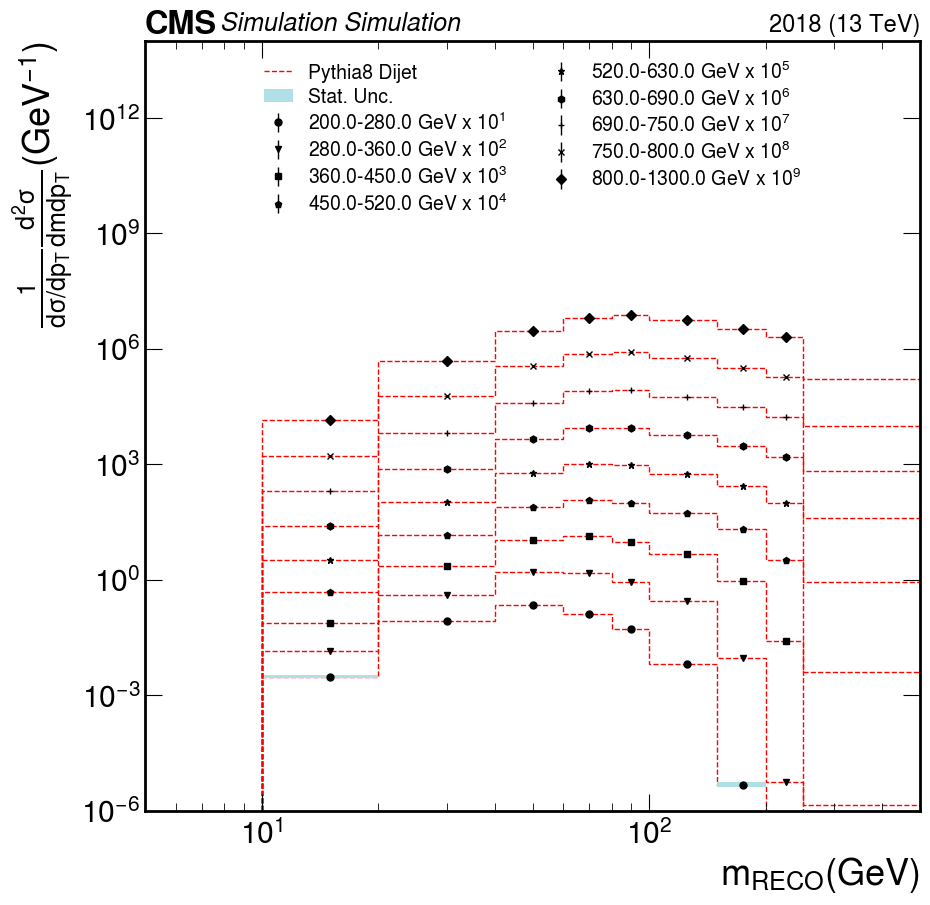

In [10]:
plotStackedOutput(result["response_matrix_u"], u, channel = channel, os_path=os_path+"Closure",IOV=year)

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 4 output bins do not depend on the input data  1 10-11 112
Info in <TUnfold::TUnfold>: 220 input bins and 109 output bins (includes 1 underflow bin)
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (xaxis:generator[0.5,1.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:generator[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:generator[10.5,11.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #112 (xaxis:generator[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 55/220 input bins have zero error, and are ignored.
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testGroomedClosureOutput_allbins2018.png has been created


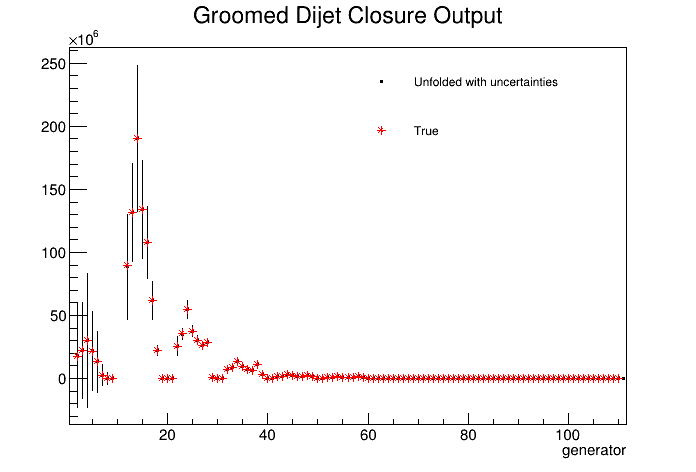

In [11]:
#### do closure test for groomed
M = syst_hist_dict["nominal"]["MCGenRec_g"]
M.SetName("Matrix to unfold")
h = syst_hist_dict["nominal"]["MCGenRec_g"].ProjectionY("Reco groomed")
h = syst_hist_dict["nominal"]["MCReco_g"]
h.SetName("Reco")
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"
u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
for syst in [syst for syst in availSysts if syst!="nominal"]:
    u.AddSysError(syst_hist_dict[syst]["MCGenRec_g"], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.SetInput(h)
u.DoUnfold(0.0)
o=u.GetOutput("Groomed "+channel+" Closure Output")
o.SetMarkerStyle(7)
o.SetLineColor(ROOT.kBlack)
# htrue = syst_hist_dict["nominal"]["MCGenRec_g"].ProjectionX("Gen groomed")
htrue = syst_hist_dict["nominal"]["MCTruth_g"]
htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.Draw()
a.SaveAs(os_path+"GroomedClosureOutput_allbins"+year+".png")


In [12]:
# plotUnfoldOutputHist(result["response_matrix_g"], u, channel=channel, os_path=os_path+"Closure", IOV=year, groomed=True)

[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0, 13000.0]
Check that sum of values  738035576.1987252  is same as integrate  738070769.1936368
oVals after norm  [ 8.87646108e+07  1.31666758e+08  1.90364869e+08  1.34042858e+08
  1.07971108e+08  6.20942708e+07  2.19688530e+07  2.07031527e+04
  1.05003738e+04 -8.10806696e+03]  by value  736896423.2352242
Check that sum of values  239723207.198692  is same as integrate  239741647.1440126
oVals after norm  [2.56888118e+07 3.53216260e+07 5.48285177e+07 3.76922183e+07
 3.05286334e+07 2.59359541e+07 2.88461282e+07 1.07574455e+06
 2.06347082e+03 1.28242864e+03]  by value  239920979.9610004
Check that sum of values  67074611.32194049  is same as integrate  67082900.1661802
oVals after norm  [6.88265504e+06 8.62934475e+06 1.38326136e+07 9.51212553e+06
 7.40270064e+06 6.32702434e+06 1.14491399e+07 2.93298931e+06
 8.31027334e+04 5.71118113e+02]  by value  67052267.04087367
Check that sum of values  16486687.170089994  is same

Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


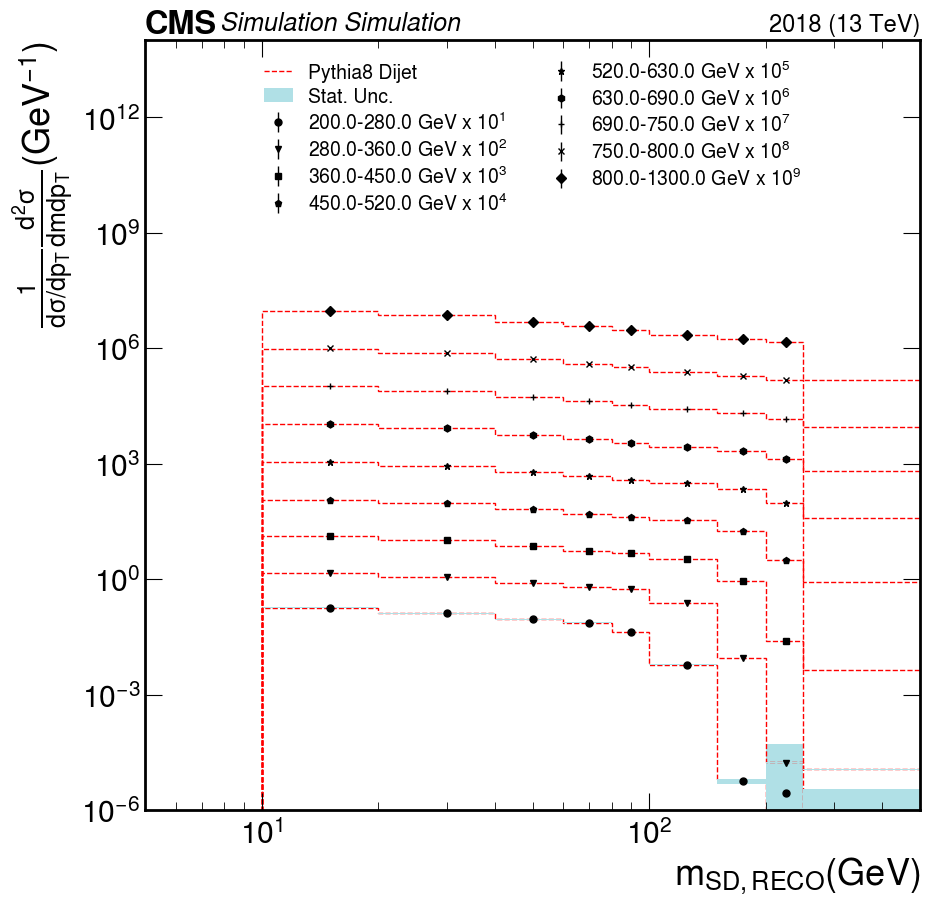

In [13]:
plotStackedOutput(result["response_matrix_g"], u, channel = channel, os_path=os_path+"Closure", IOV=year, groomed=True)

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 7 output bins do not depend on the input data  9-11 20-21 31 112
Info in <TUnfold::TUnfold>: 220 input bins and 106 output bins (includes 1 underflow bin)
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (xaxis:generator[8.5,9.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:generator[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:generator[10.5,11.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #20 (xaxis:generator[19.5,20.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #21 (xaxis:generator[20.5,21.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #31 (xaxis:generator[30.5,31.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #112 (xaxis:generator[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=2 densityMode=3 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 111/

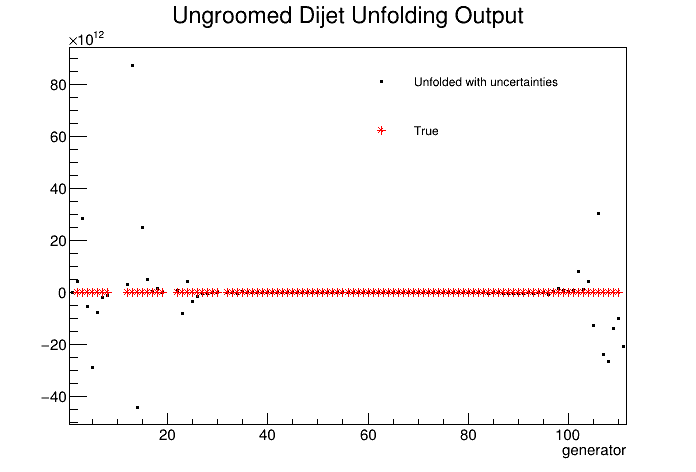

In [14]:
#### do data unfolding test for ungroomed
M = syst_hist_dict["nominal"]["MCGenRec_u"]
M.SetName("Matrix to unfold")
h = DataReco_u
orientation = ROOT.TUnfold.kHistMapOutputHoriz
#kRegModeSize,kRegModeDerivative, kRegModeCurvature
regMode = ROOT.TUnfold.kRegModeDerivative
con = ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"
u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
for syst in [syst for syst in availSysts if syst!="nominal"]:
    u.AddSysError(syst_hist_dict[syst]["MCGenRec_u"], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.SetInput(h)
#### DEFINE REGULARIZATION PARAMS
nScan = 50
tauMin= 0
tauMax= 0
iBest=0
logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
iBest=u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
# u.DoUnfold(0.0)
o=u.GetOutput("Ungroomed "+channel+" Unfolding Output")
o.SetMarkerStyle(7)
o.SetLineColor(ROOT.kBlack)
# htrue = syst_hist_dict["nominal"]["MCGenRec_g"].ProjectionX("Gen groomed")
htrue = syst_hist_dict["nominal"]["MCTruth_u"]
htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_allbins"+year+".png")


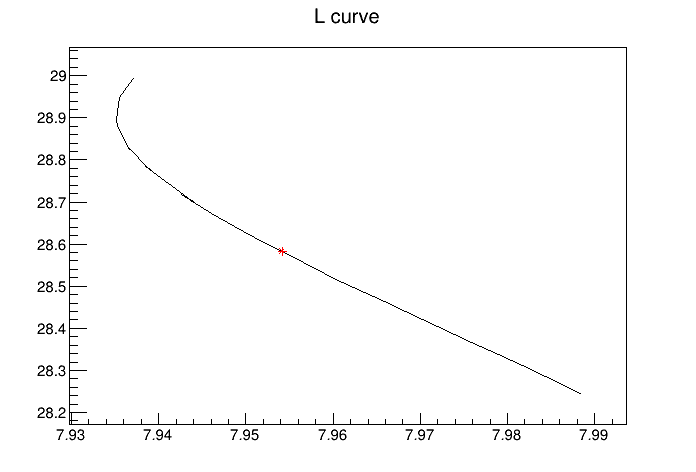

In [15]:
#### Plot Lcurve
cL = ROOT.TCanvas()

x = array.array('d',[0] )
y = array.array('d',[0] )
lCurve.Draw('alp same')

lCurve.GetPoint(iBest, x, y)

bestLCurve=ROOT.TGraph(1,x,y)
bestLCurve.SetMarkerStyle(3)
bestLCurve.SetMarkerColor(ROOT.kRed)
bestLCurve.Draw('same *')
cL.Draw()

[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0, 13000.0]
Check that sum of values  738070769.1936364  is same as integrate  738070769.1936363
oVals after norm  [ 3.28946966e+12  8.73890517e+13 -4.41600481e+13  2.48771527e+13
  4.96258021e+12  4.04258316e+11  1.66777662e+12 -1.31592742e+09
  0.00000000e+00  0.00000000e+00]  by value  78428925113851.53


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  239741647.14401263  is same as integrate  239741647.14401266
oVals after norm  [ 1.03109037e+12 -7.92931293e+12  4.47511072e+12 -3.31349800e+12
 -1.57888486e+12 -2.24261405e+11 -4.39220857e+11 -2.53750834e+10
  9.19012953e+08  0.00000000e+00]  by value  -8003433030054.366


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  67082900.166180216  is same as integrate  67082900.166180216
oVals after norm  [-2.79021557e+10  5.98012577e+10 -1.25259375e+11  3.69980104e+11
  2.51404499e+11  5.45228242e+10  6.75173897e+10  1.33401576e+10
 -2.13777826e+08  9.26622613e+07]  by value  663283585753.201


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  16489300.082022136  is same as integrate  16489300.082022136
oVals after norm  [-5.38178569e+09 -3.11280464e+10  4.44121617e+10 -4.66914595e+10
 -3.82569227e+10 -1.38448131e+10 -1.19995279e+10 -4.28242296e+09
 -1.49109074e+09 -2.07489208e+09]  by value  -110738799298.26158


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  9239286.996274538  is same as integrate  9239286.996274538
oVals after norm  [-6.76155012e+08  2.58405645e+10 -1.74442138e+10  5.10965023e+09
  5.08371662e+09  1.07757946e+10  1.75630254e+10  8.76269106e+09
  3.99360772e+09  1.79685200e+10]  by value  76977201277.35724


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  2013291.5029224884  is same as integrate  2013291.5029224884
oVals after norm  [-3.63095377e+08  7.87238713e+08 -3.43676818e+10  3.19332825e+10
  1.08940947e+10 -3.27693319e+10 -6.75807026e+10 -3.73560425e+10
 -1.74656198e+10 -5.07813417e+10]  by value  -197069199737.0959


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  1148643.7156809545  is same as integrate  1148643.7156809545
oVals after norm  [ 3.16560993e+09  8.23253469e+10 -2.41721297e+10 -7.94745845e+09
 -7.89848483e+10  8.65778223e+10  1.93418861e+11  1.09618515e+11
  5.78453200e+10  9.11472924e+10]  by value  512994330607.64685


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  591146.566993817  is same as integrate  591146.5669938172
oVals after norm  [ 2.92387533e+08 -7.63616165e+09 -1.19949617e+11  7.43014086e+10
  1.72562662e+11 -1.82135839e+11 -4.77320737e+11 -2.60495164e+11
 -1.60872507e+11 -1.70298452e+11]  by value  -1131552019029.7922


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  1035076.4481739604  is same as integrate  1035076.4482596542
oVals after norm  [-2.14103782e+10 -1.70861206e+11  2.15428530e+11  1.52568450e+11
 -7.45528803e+11  5.23629549e+11  1.52275394e+12  8.40559691e+11
  5.70415371e+11  7.55051225e+11]  by value  3642606372253.2637


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  32572.05575494154  is same as integrate  32576.110257063276
oVals after norm  [ 8.33557139e+12  1.31800364e+12  4.24435328e+12 -1.27352500e+13
  3.04872685e+13 -2.37083946e+13 -2.63332060e+13 -1.38967959e+13
 -9.94567629e+12 -2.05839283e+13]  by value  -62818054294465.11


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum
Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


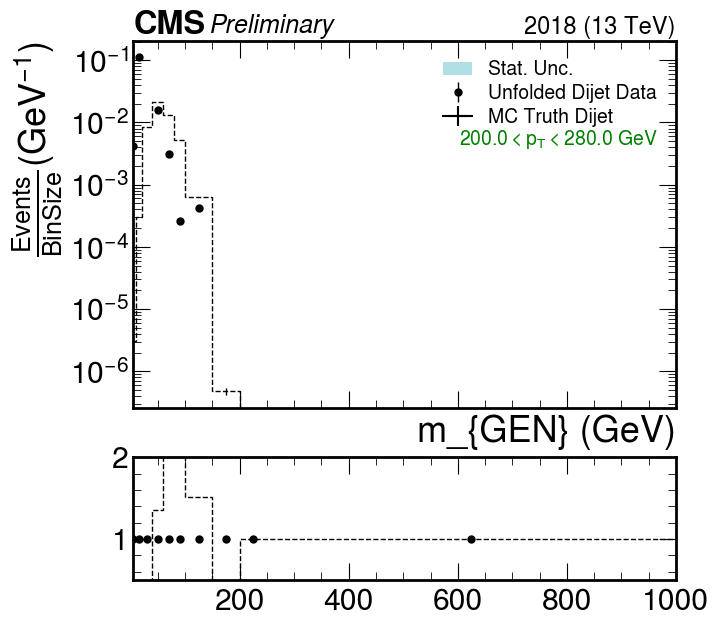

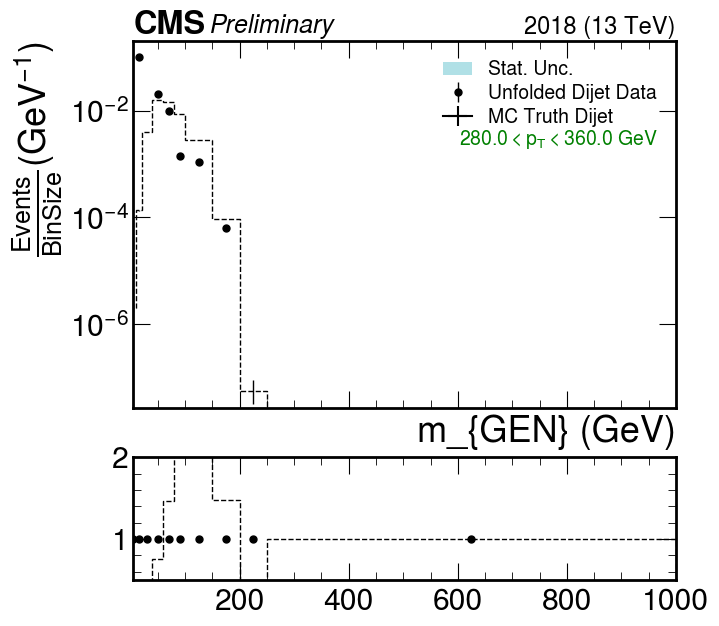

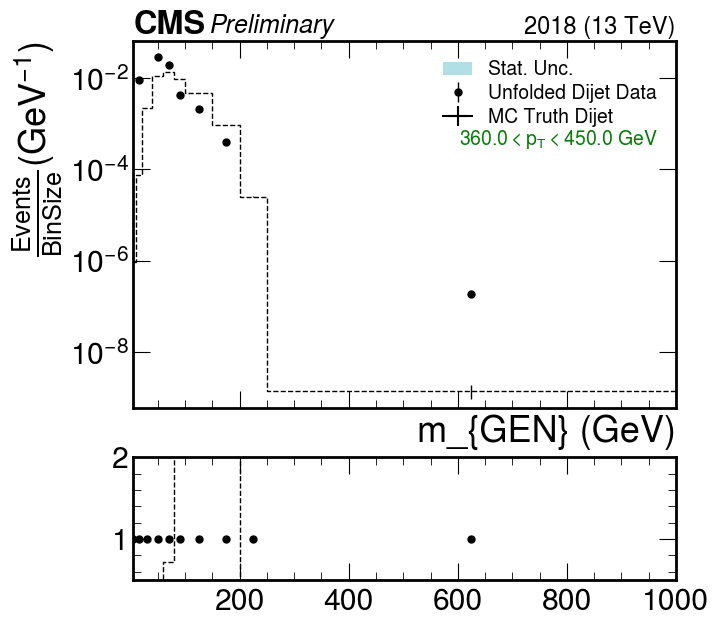

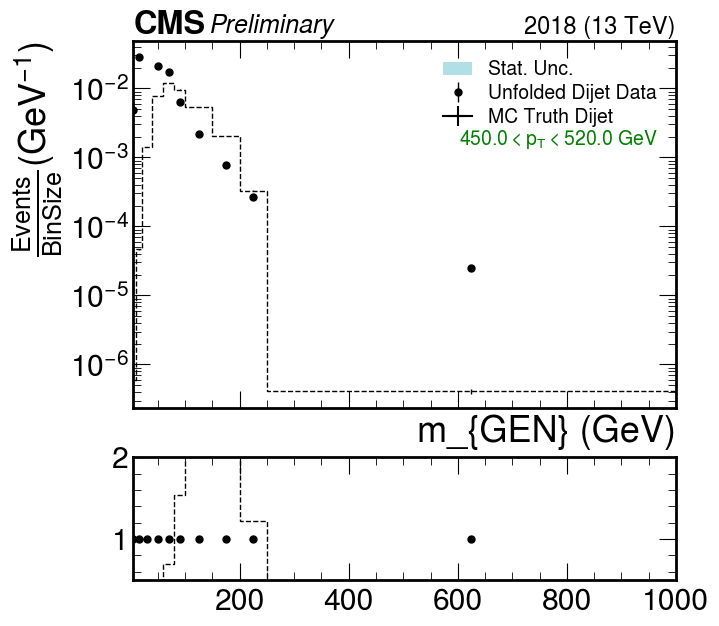

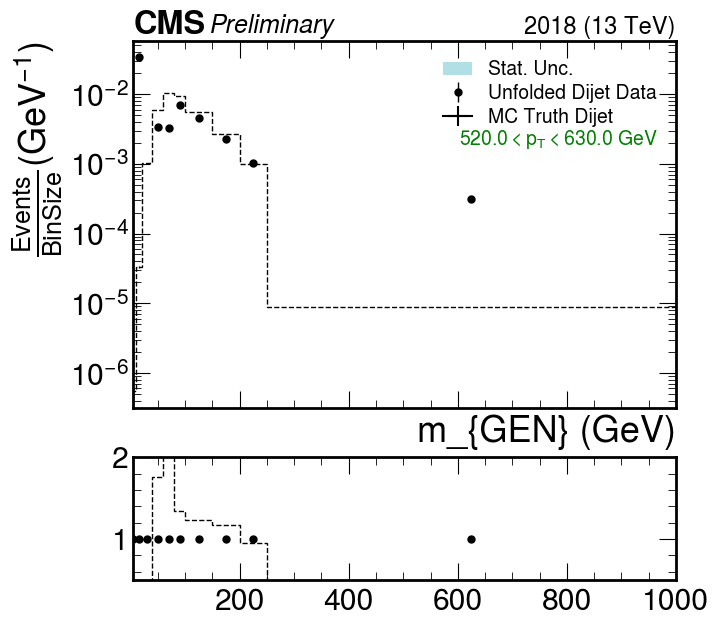

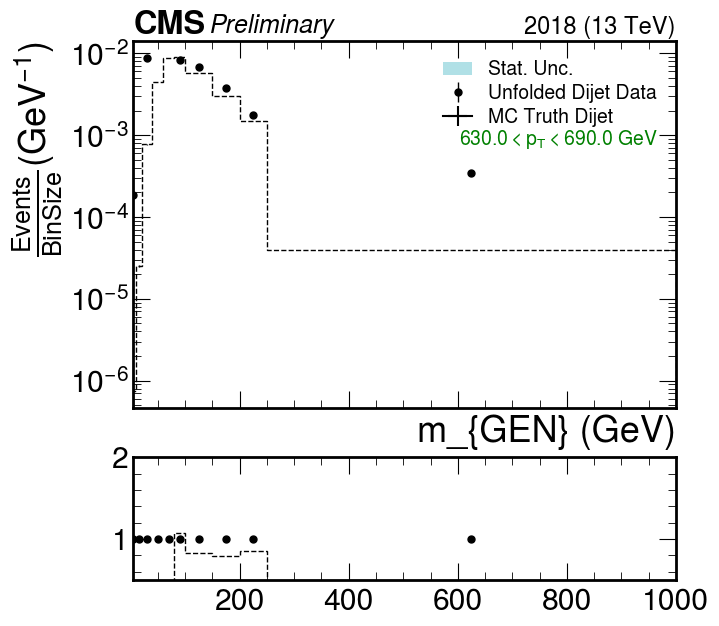

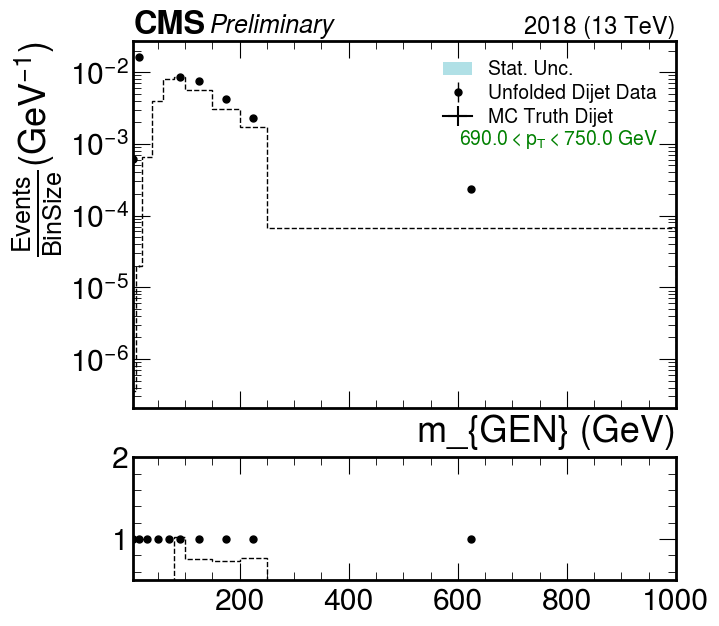

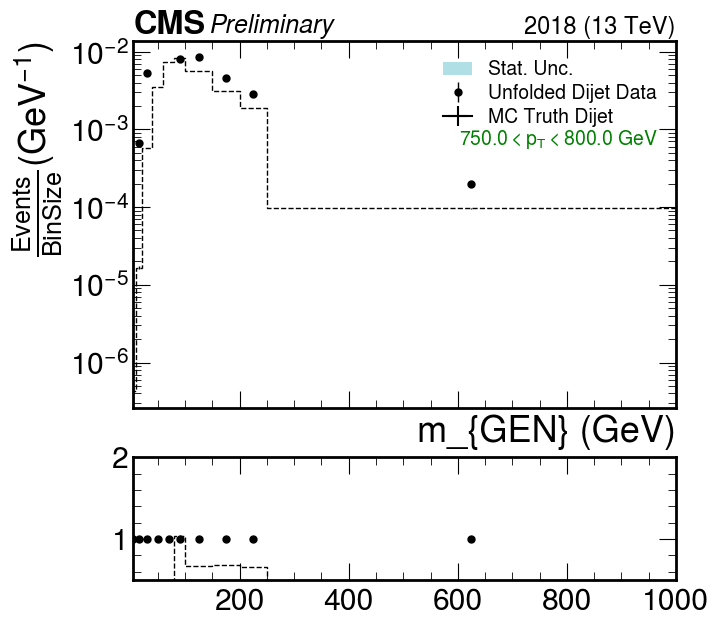

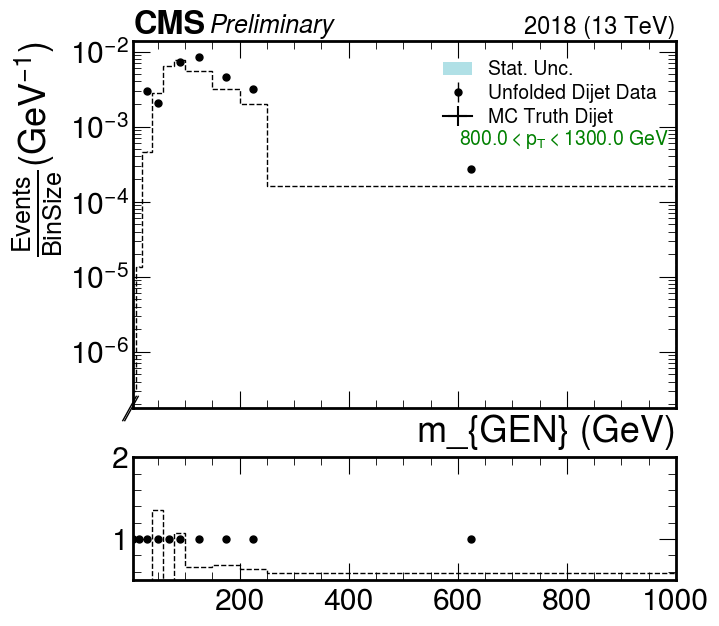

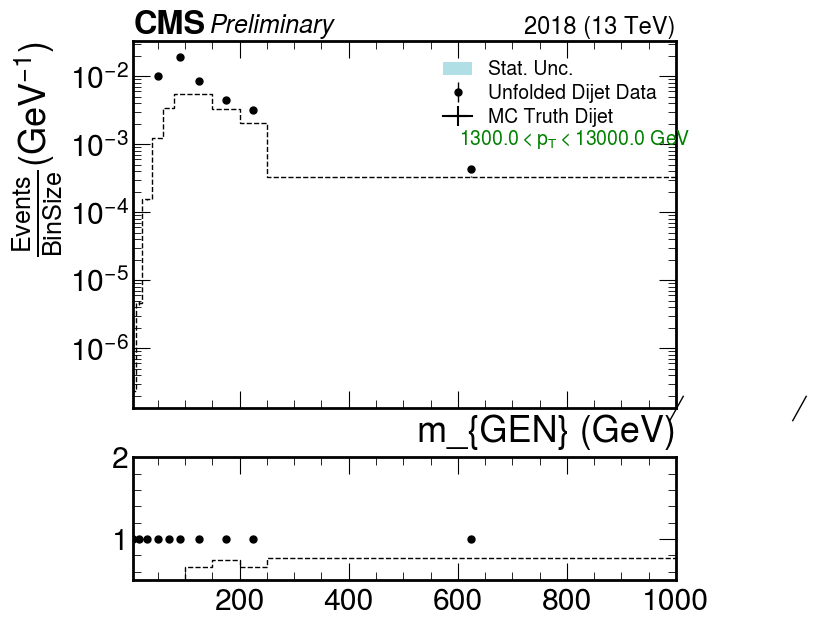

In [16]:
plotUnfoldOutputHist(result["response_matrix_u"], u, channel=channel, os_path=os_path, IOV=year)

[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0, 13000.0]
Check that sum of values  738070769.1936364  is same as integrate  738070769.1936363
oVals after norm  [ 3.28946966e+12  8.73890517e+13 -4.41600481e+13  2.48771527e+13
  4.96258021e+12  4.04258316e+11  1.66777662e+12 -1.31592742e+09
  0.00000000e+00  0.00000000e+00]  by value  78428925113851.53
Check that sum of values  239741647.14401263  is same as integrate  239741647.14401266
oVals after norm  [ 1.03109037e+12 -7.92931293e+12  4.47511072e+12 -3.31349800e+12
 -1.57888486e+12 -2.24261405e+11 -4.39220857e+11 -2.53750834e+10
  9.19012953e+08  0.00000000e+00]  by value  -8003433030054.366
Check that sum of values  67082900.166180216  is same as integrate  67082900.166180216
oVals after norm  [-2.79021557e+10  5.98012577e+10 -1.25259375e+11  3.69980104e+11
  2.51404499e+11  5.45228242e+10  6.75173897e+10  1.33401576e+10
 -2.13777826e+08  9.26622613e+07]  by value  663283585753.201
Check that sum of values  1

Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


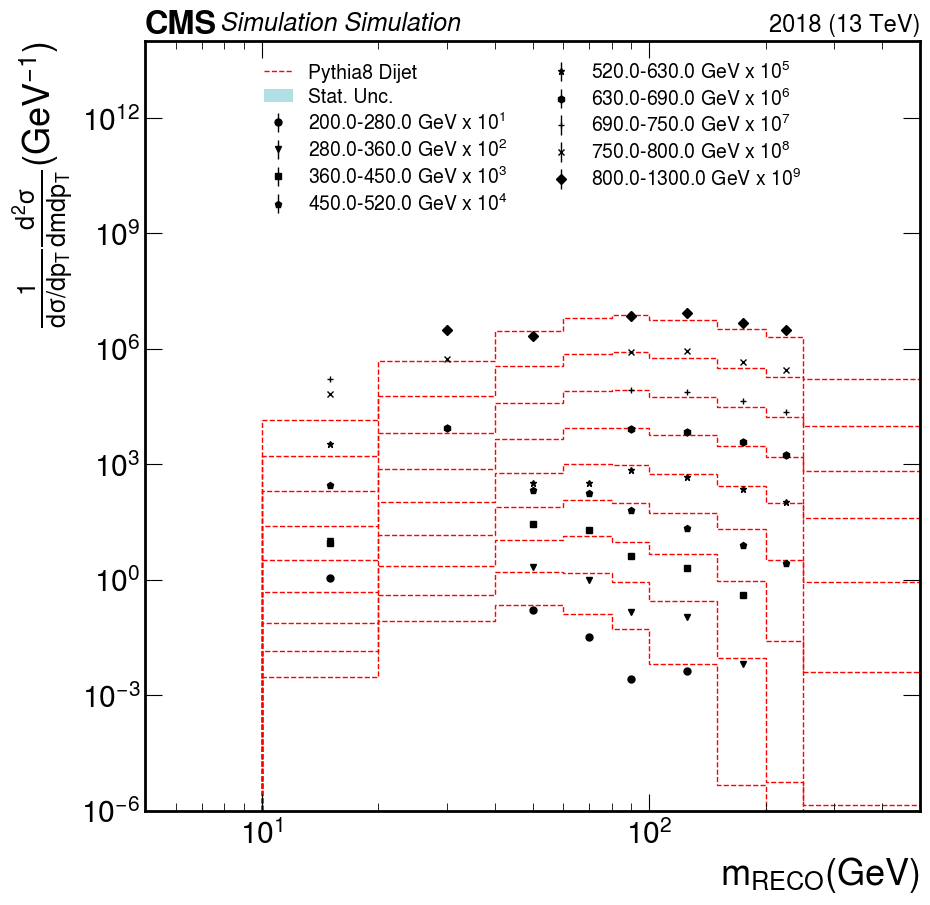

In [17]:
plotStackedOutput(result["response_matrix_u"], u, channel = channel, os_path=os_path, IOV=year)

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 4 output bins do not depend on the input data  1 10-11 112
Info in <TUnfold::TUnfold>: 220 input bins and 109 output bins (includes 1 underflow bin)
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (xaxis:generator[0.5,1.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:generator[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:generator[10.5,11.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #112 (xaxis:generator[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 112/220 input bins have zero error, and are ignored.
Warning in <TUnfoldDensity::SetInput>: no data to constrain output bin #9 (xaxis:generator[8.5,9.5])
Error in <TUnfoldDensity::SetInput>: One output bins is not constrained by any data.
Error in <TUnfoldDensity::GetInputI

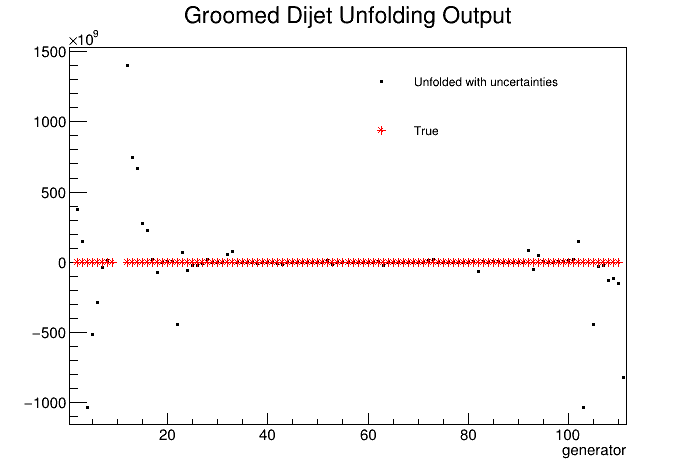

In [18]:
#### do data unfolding test for groomed
M = syst_hist_dict["nominal"]["MCGenRec_g"]
M.SetName("Matrix to unfold")
h = DataReco_g
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"
u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
for syst in [syst for syst in availSysts if syst!="nominal"]:
    u.AddSysError(syst_hist_dict[syst]["MCGenRec_g"], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.SetInput(h)
# nScan = 50
# tauMin= 0
# tauMax= 0
# iBest=0
logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
# iBest=u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
u.DoUnfold(0.0)
o=u.GetOutput("Groomed "+channel+" Unfolding Output")
o.SetMarkerStyle(7)
o.SetLineColor(ROOT.kBlack)
# htrue = syst_hist_dict["nominal"]["MCGenRec_g"].ProjectionX("Gen groomed")
htrue = syst_hist_dict["nominal"]["MCTruth_g"]
htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.Draw()
a.SaveAs(os_path+"GroomedUnfoldingOutput_allbins"+year+".png")


[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0, 13000.0]
Check that sum of values  738035576.1987252  is same as integrate  738070769.1936368
oVals after norm  [ 1.40328012e+12  7.49295503e+11  6.71038428e+11  2.75734966e+11
  2.26455167e+11  1.92606279e+10 -7.25399359e+10  1.82024706e+09
  4.25555909e+09  4.93981735e+09]  by value  3283540499831.8613


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  239723207.198692  is same as integrate  239741647.1440126
oVals after norm  [-4.42623970e+11  6.70097332e+10 -5.75566346e+10 -2.44491673e+10
 -2.14747100e+10 -9.87881916e+09  2.19403098e+10  2.28392291e+08
  2.60964126e+08  7.31365055e+08]  by value  -465812536105.6107


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  67074611.32194049  is same as integrate  67082900.1661802
oVals after norm  [ 5.90038022e+10  7.35027285e+10 -3.67065431e+09 -2.12367406e+09
  1.35773941e+08 -9.58662006e+08 -7.00988180e+09 -1.73314804e+09
  8.77516871e+06  1.36117069e+08]  by value  117291176700.21568


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  16486687.170089994  is same as integrate  16489300.082022132
oVals after norm  [-6.65169943e+09 -1.56395534e+10 -2.98697743e+08  4.60919579e+08
  1.50771685e+08  1.09151635e+08  1.20105029e+09  5.81245822e+08
  6.32419484e+07 -5.97959298e+07]  by value  -20083365568.321556


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  9237313.837545728  is same as integrate  9239286.996274542
oVals after norm  [ 1.43202614e+10 -1.84680274e+10 -2.56834660e+08  7.63079988e+07
  1.36582673e+08  1.42499648e+08  1.30762146e+08  2.37993663e+08
  1.96914269e+08  4.64420596e+08]  by value  -3019119625.723757


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  2012748.6738994617  is same as integrate  2013291.5029224881
oVals after norm  [ 5.98701666e+09 -2.30133024e+10 -7.71610599e+08  4.95710975e+08
  4.39334635e+08  2.74444243e+08  4.44066321e+08  1.42385326e+08
 -1.63831336e+08 -1.30072257e+09]  by value  -17466508718.361946


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  1148300.289013587  is same as integrate  1148643.7156809545
oVals after norm  [ 9.73122169e+09  1.84523722e+10 -7.93134073e+08 -1.12700627e+09
 -9.20995063e+08 -4.00006110e+08 -2.13390806e+08  2.83052693e+08
  8.53973534e+08  2.50432812e+09]  by value  28370415869.794975


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  590946.9902715363  is same as integrate  591146.5669938172
oVals after norm  [-6.47240408e+10  4.48450835e+09 -1.95706443e+09  3.51729076e+09
  2.54816958e+09  9.23584251e+08  2.69304599e+08 -7.56593814e+08
 -2.40223463e+09 -4.24859630e+09]  by value  -62345672422.44563


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  1034651.2887278737  is same as integrate  1035076.4482596543
oVals after norm  [ 8.55868548e+10 -4.90404147e+10  4.51570060e+10  6.36457653e+09
 -2.62484811e+09  8.11344679e+08  5.75197162e+09  5.98060688e+09
  1.04221989e+10  1.98826296e+10]  by value  128291926204.11227


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  32534.724838931583  is same as integrate  32576.110257063272
oVals after norm  [ 1.50021827e+11 -1.03182641e+12  9.88319565e+11 -4.41508015e+11
 -2.87724344e+10 -1.95030700e+10 -1.31061926e+11 -1.17427603e+11
 -1.52110445e+11 -8.20704879e+11]  by value  -1604573390391.7263


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_78542/624535255.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum
Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


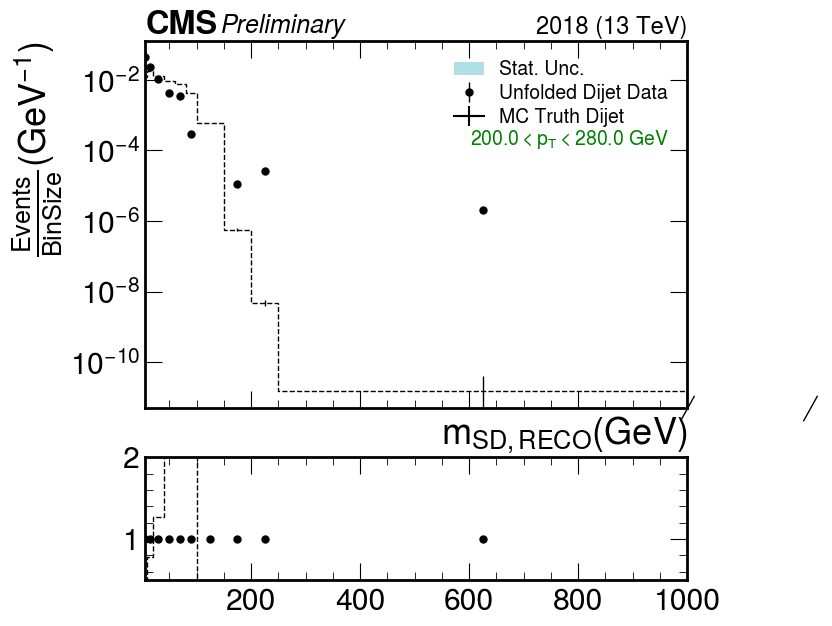

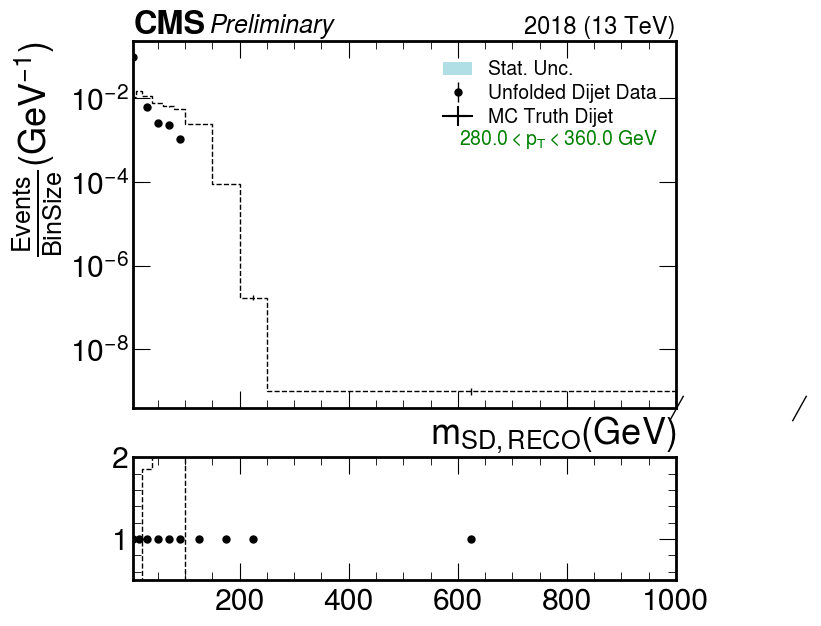

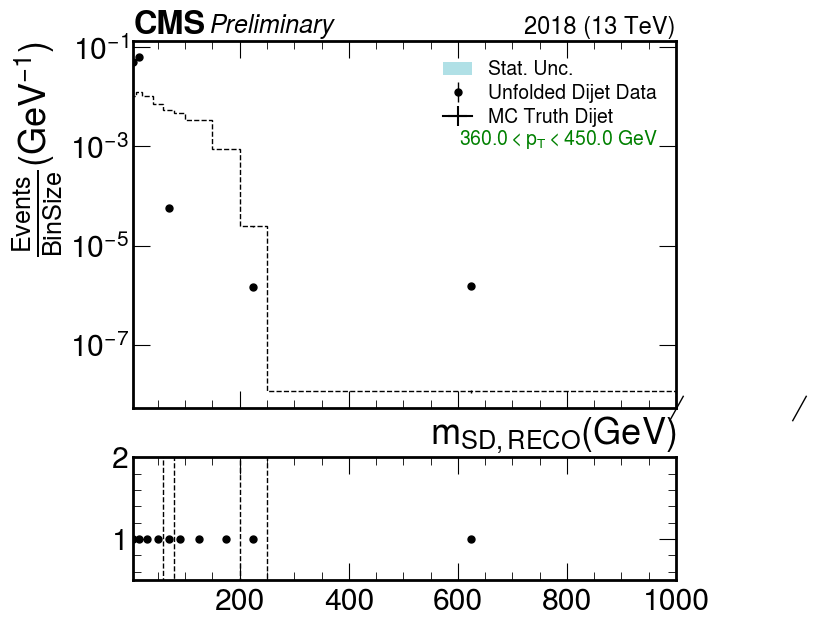

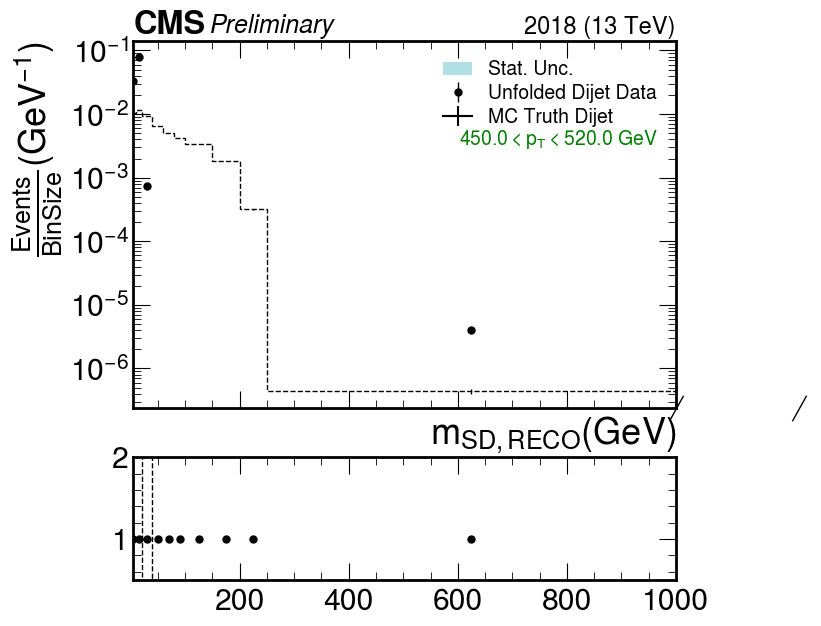

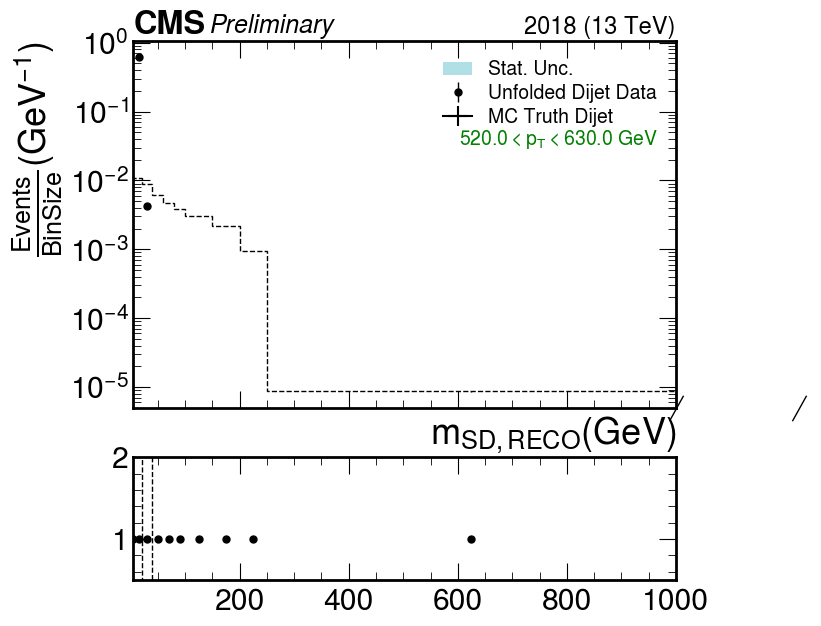

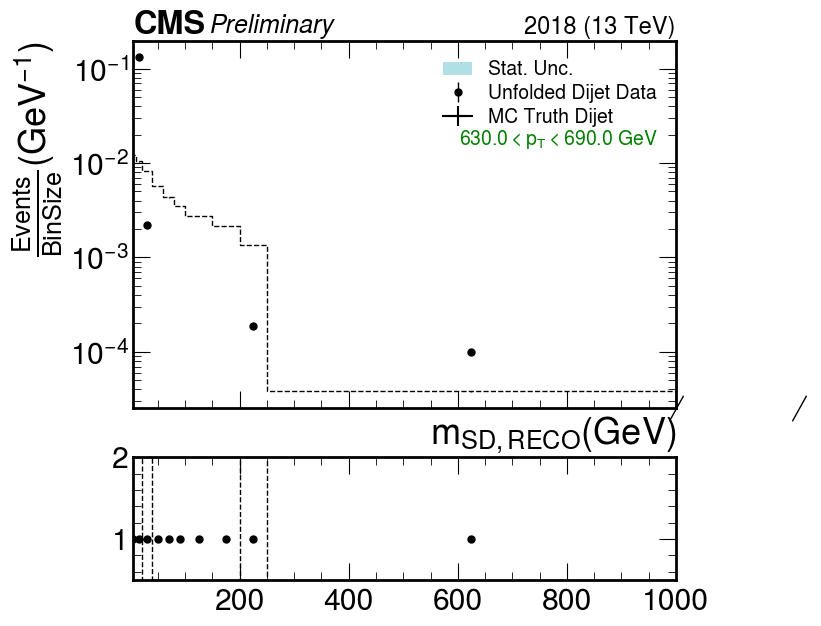

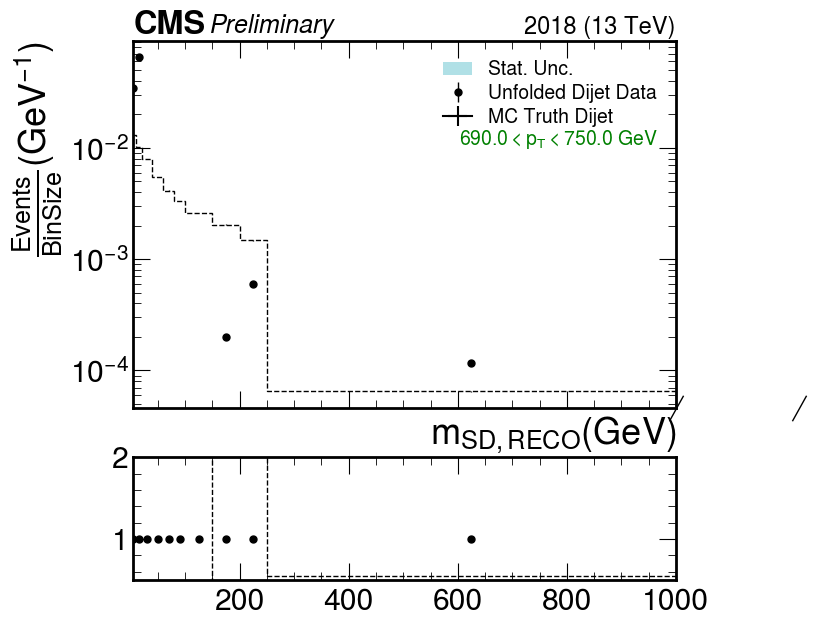

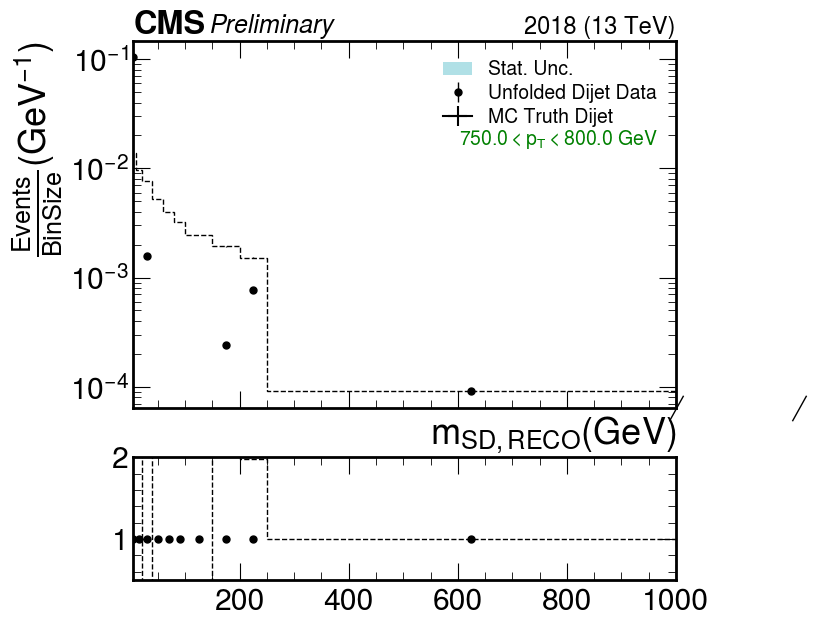

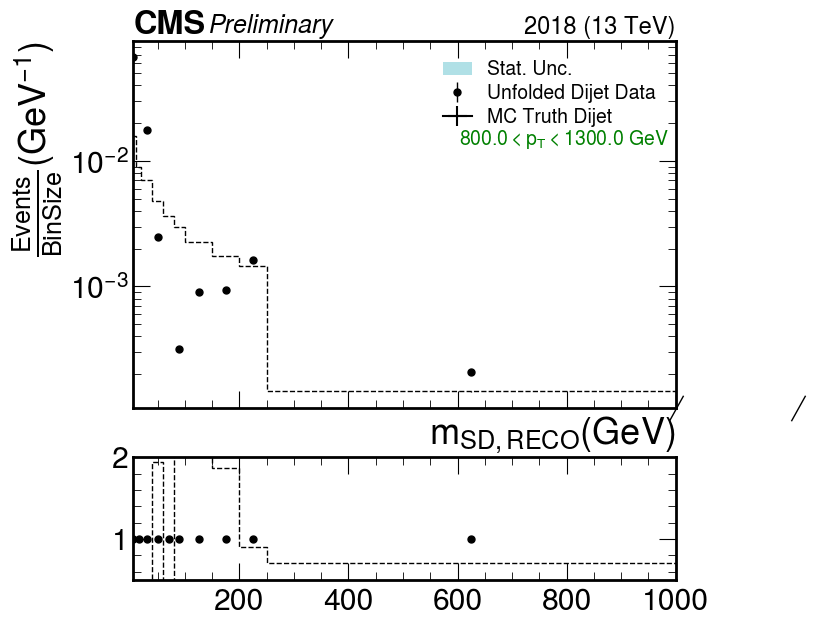

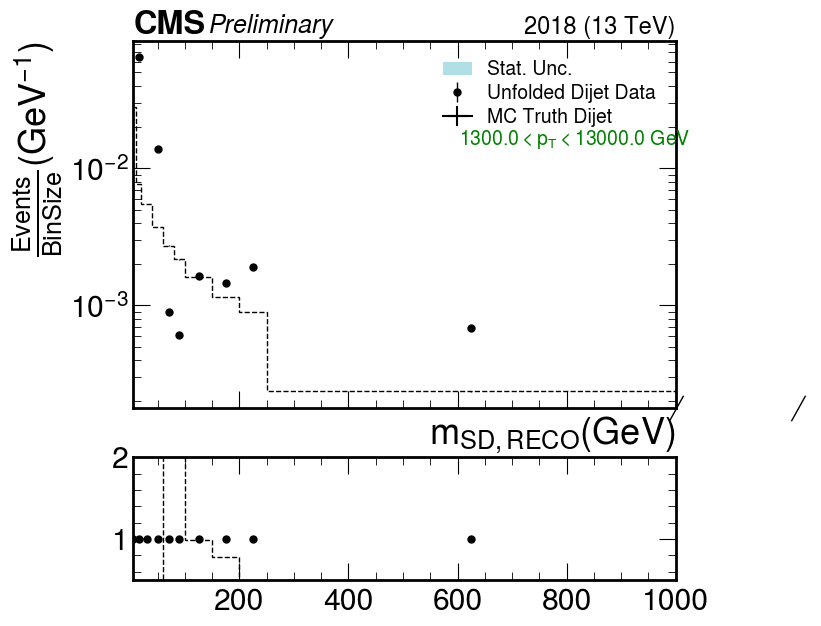

In [19]:
plotUnfoldOutputHist(result["response_matrix_g"], u, channel=channel, os_path=os_path, IOV=year, groomed=True)

[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0, 13000.0]
Check that sum of values  738035576.1987252  is same as integrate  738070769.1936368
oVals after norm  [ 1.40328012e+12  7.49295503e+11  6.71038428e+11  2.75734966e+11
  2.26455167e+11  1.92606279e+10 -7.25399359e+10  1.82024706e+09
  4.25555909e+09  4.93981735e+09]  by value  3283540499831.8613
Check that sum of values  239723207.198692  is same as integrate  239741647.1440126
oVals after norm  [-4.42623970e+11  6.70097332e+10 -5.75566346e+10 -2.44491673e+10
 -2.14747100e+10 -9.87881916e+09  2.19403098e+10  2.28392291e+08
  2.60964126e+08  7.31365055e+08]  by value  -465812536105.6107
Check that sum of values  67074611.32194049  is same as integrate  67082900.1661802
oVals after norm  [ 5.90038022e+10  7.35027285e+10 -3.67065431e+09 -2.12367406e+09
  1.35773941e+08 -9.58662006e+08 -7.00988180e+09 -1.73314804e+09
  8.77516871e+06  1.36117069e+08]  by value  117291176700.21568
Check that sum of values  1648

Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


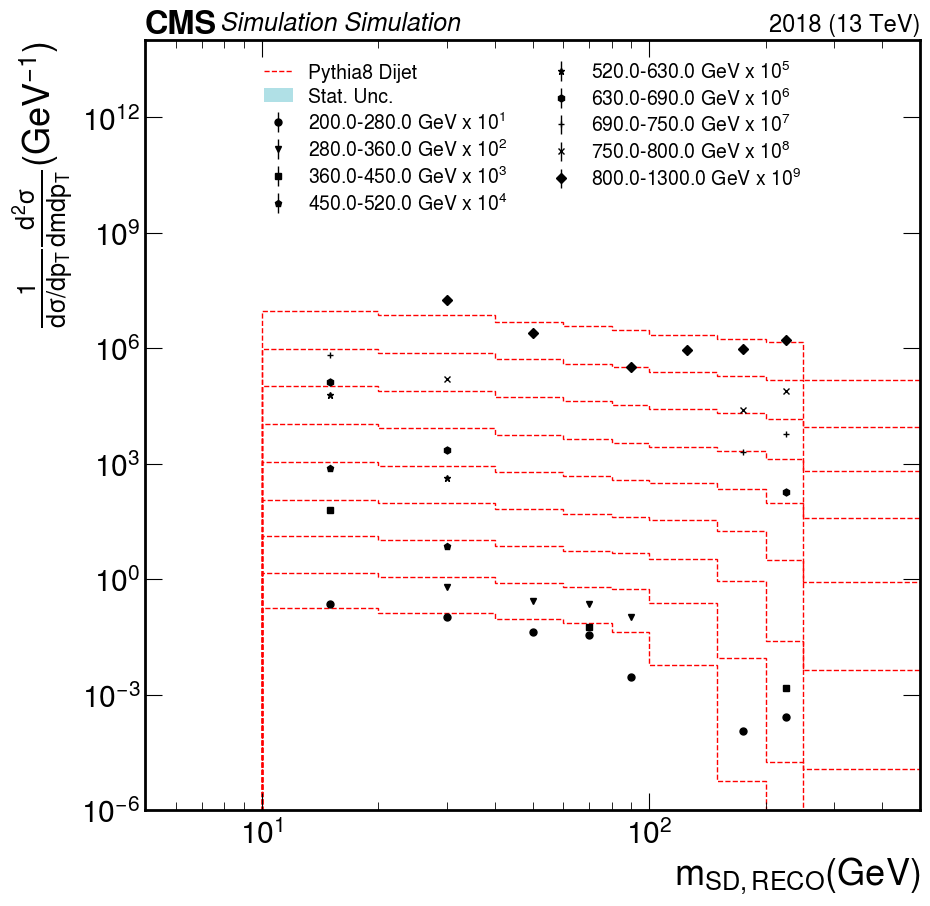

In [20]:
plotStackedOutput(result["response_matrix_g"], u, channel = channel, os_path=os_path, IOV=year, groomed=True)